In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

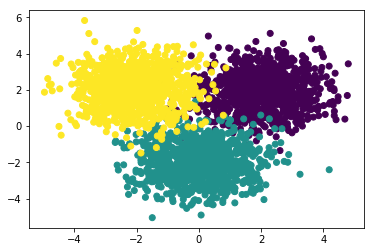

In [8]:
D = 2
K = 3
N = K*1000

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.scatter(X[:,0],X[:,1],c = y)

In [15]:

def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def sigmoid(H):
    return 1/(1 + np.exp(-H))

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis = 1, keepdims = True)

def feed_forward(X, W1, b1, W2, b2):
    Z1 = sigmoid(np.matmul(X,W1) + b1)
    P = softmax(np.matmul(Z1,W2) + b2)
    return Z1, P

def cross_entropy(Y,P):
    return -np.sum(Y*np.log(P))

def accuracy(y, P):
    return np.mean(y == P.argmax(axis = 1))

In [10]:
Y = one_hot_encode(y)

In [11]:
M1 = 4


W1 = np.random.randn(D,M1)
b1 = np.random.randn(M1)
W2 = np.random.randn(M1,K)
b2 = np.random.randn(K)

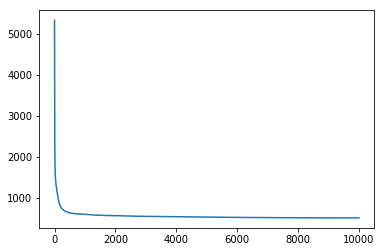

In [16]:
J = []
eta = 1e-4
epochs = int(1e4)

for epoch in range(epochs):
    Z1, P = feed_forward(X,W1,b1,W2,b2)
    J.append(cross_entropy(Y,P))
    
    dH2 = P - Y
    dW2 = np.matmul(Z1.T, dH2)
    W2 -= eta*dW2
    b2 -= eta*dH2.sum(axis = 0)
    
    
    dZ1 = np.matmul(dH2, W2.T)
    dH1 = dZ1*(1 - Z1*Z1)
    dW1 = np.matmul(X.T, dH1)
    W1 -= eta*dW1
    b1 -= eta*dH1.sum(axis = 0)
    
plt.plot(J)

In [17]:
print("Accuracy: {}".format(accuracy(y,P)))


Accuracy: 0.9366666666666666
